<a href="https://colab.research.google.com/github/olgasilyutina/sirius_tutorial/blob/master/sirius_stat_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Подгружаем библиотеки для работы
% matplotlib inline
from random import seed
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Устанавливаем seed для того, чтобы получать одни и те же значения при случайной генерации
seed(1)
# Генерируем распределение Пуассона - это наша генеральная совокупность
clicks = np.random.poisson(1.0, 10000000)

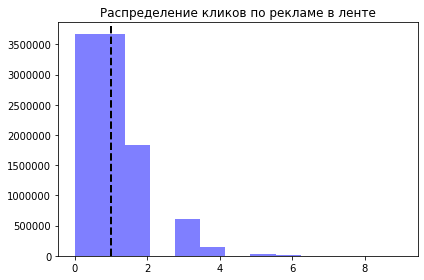

In [0]:
fig = plt.hist(clicks, bins=13, color='blue', edgecolor=None, alpha=0.5)
plt.axvline(clicks.mean(), color='k', linestyle='--', linewidth=2)
plt.title('Распределение кликов по рекламе в ленте')
plt.tight_layout()

In [0]:
# Возьмем 1% от нашей генеральной совокупности 
sample_size = int(round(len(clicks)*1/100, 0))
clicks_sample = np.random.choice(clicks, sample_size, replace=False)

In [0]:
len(clicks_sample)

100000

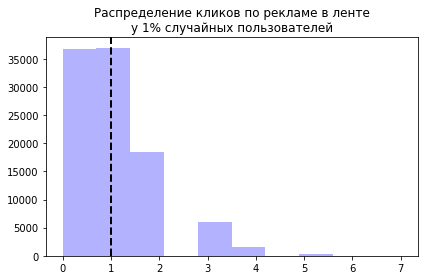

In [0]:
fig = plt.hist(clicks_sample, bins=10, color='blue', edgecolor=None, alpha=0.3)
plt.axvline(clicks_sample.mean(), color='k', linestyle='--', linewidth=2)
plt.title('Распределение кликов по рекламе в ленте\nу 1% случайных пользователей')
plt.tight_layout()

In [0]:
# Разделим полученную выборку на тест и контроль (группы A и B)

In [0]:
def partition (list_in, n):
    list_in = random.sample(list_in, len(list_in)) 
    return [list_in[i::n] for i in range(n)]

In [0]:
control, test = partition(list(clicks_sample), 2)

In [0]:
len(control)

50000

In [0]:
len(test)

50000

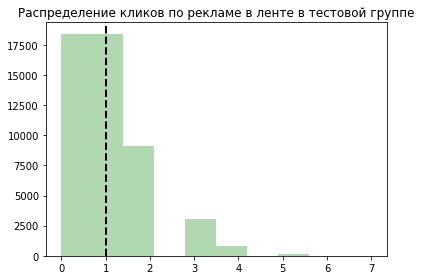

In [0]:
fig = plt.hist(test, bins=10, color='green', edgecolor=None, alpha=0.3)
plt.axvline(clicks_sample.mean(), color='k', linestyle='--', linewidth=2)
plt.title('Распределение кликов по рекламе в ленте в тестовой группе')
plt.tight_layout()

In [0]:
np.mean(test)

0.99844

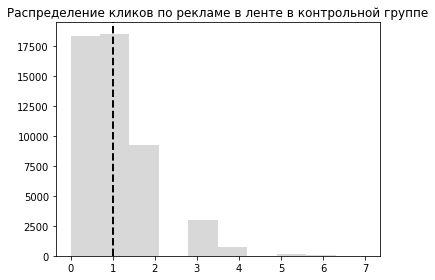

In [0]:
fig = plt.hist(control, bins=10, color='grey', edgecolor=None, alpha=0.3)
plt.axvline(clicks_sample.mean(), color='k', linestyle='--', linewidth=2)
plt.title('Распределение кликов по рекламе в ленте в контрольной группе')
plt.tight_layout()

In [0]:
np.mean(control)

0.99788

In [0]:
users = list(range(1,50001))
users = [x+1000000 for x in users]

## **Фича 1**

*Команда бэкенда поменяла алгоритм вставки рекламы в ленту и стала вставлять формат видео, который привлекает больше кликов, на первые позиции в ленте*

## **Альтернативная гипотеза** 

Среднее количество кликов в тестовой группе выше, чем среднее количество кликов в контрольной группе

## **Нулевая гипотеза**

Среднее количество кликов в тестовой группе не отличается от тестового количества кликов в контрольной группе

In [0]:
# Генерируем датасет будто мы применили нашу фичу к данным 
hyp_1 = pd.DataFrame({'user': users, 'test': test, 'control': control})

In [0]:
video_uplift = []
for _ in range(0, len(hyp_1['test'])):
	value = randint(0, 1)
	video_uplift.append(value)

In [0]:
hyp_1['video_test'] = round(hyp_1['test']*0.6, 0).astype(int) + video_uplift
hyp_1['image_test'] = round(hyp_1['test']*0.3, 0).astype(int)
hyp_1['lead_form_test'] = round(hyp_1['test']*0.1, 0).astype(int)

In [0]:
hyp_1['video_control'] = round(hyp_1['control']*0.3, 0).astype(int)
hyp_1['image_control'] = round(hyp_1['control']*0.6, 0).astype(int)
hyp_1['lead_form_control'] = round(hyp_1['control']*0.1, 0).astype(int)

In [0]:
hyp_1 = hyp_1.drop(['control', 'test'], axis = 1)

In [0]:
hyp_1['control'] = hyp_1['video_control'] + hyp_1['image_control'] + hyp_1['lead_form_control']
hyp_1['test'] = hyp_1['video_test'] + hyp_1['image_test'] + hyp_1['lead_form_test']

In [0]:
print('Среднее количество кликов в тестовой группе равно: ' + str(hyp_1['test'].mean()))

Среднее количество кликов в тестовой группе равно: 1.4857


In [0]:
print('Среднее количество кликов в контрольной группе равно: ' + str(hyp_1['control'].mean()))

Среднее количество кликов в контрольной группе равно: 0.9833


In [0]:
# Проверим статистическую значимость результатов при помощи метода bootstrap
# Для этого получим распределение средних значений в тестовой группе и найдем доверительный интервал

In [0]:
array = hyp_1['test'] - hyp_1['control']
sample_size = 300
permutations = 1000

def bootstrap(permutations, array, sample_size):
  sample_mean = []
  for _ in range(permutations): 
      sample_n = np.random.choice(array, size=sample_size)
      sample_mean.append(sample_n.mean())
  return sample_mean

In [0]:
sample_mean = bootstrap(permutations, array, sample_size)

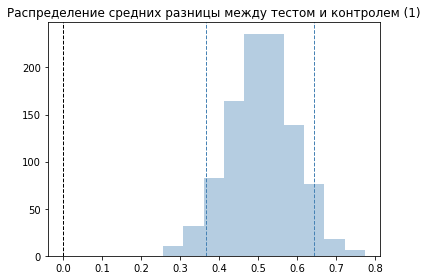

In [370]:
fig = plt.hist(sample_mean, bins=10, color='steelblue', edgecolor=None, alpha=0.4)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(np.quantile(sample_mean, 0.05), color='steelblue', linestyle='--', linewidth=1)
plt.axvline(np.quantile(sample_mean, 0.95), color='steelblue', linestyle='--', linewidth=1)
plt.title('Распределение средних разницы между тестом и контролем (1)')
plt.tight_layout()

In [352]:
print('Ожидаемая разница между тестом и контролем равна  ' + str(hyp_1['test'].mean()) \
      + ' с доверительным интервалом (' + str(round(np.quantile(sample_mean, 0.05), 2)) + ', ' \
      + str(round(np.quantile(sample_mean, 0.95), 2)) + ')')

Ожидаемая разница между тестом и контролем равна  1.4857 с доверительным интервалом (0.37, 0.64)


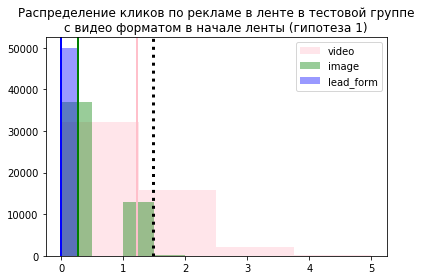

In [0]:
plt.hist(hyp_1['video_test'], bins=4, color='pink', edgecolor=None, alpha=0.4, label='video')
plt.hist(hyp_1['image_test'], bins=4, color='green', edgecolor=None, alpha=0.4, label='image')
plt.hist(hyp_1['lead_form_test'], bins=4, color='blue', edgecolor=None, alpha=0.4, label='lead_form')
plt.axvline(hyp_1['video_test'].mean(), color='pink', linestyle='-', linewidth=2)
plt.axvline(hyp_1['image_test'].mean(), color='green', linestyle='-', linewidth=2)
plt.axvline(hyp_1['lead_form_test'].mean(), color='blue', linestyle='-', linewidth=2)
plt.axvline(hyp_1['test'].mean(), color='k', linestyle=':', linewidth=3)
plt.title('Распределение кликов по рекламе в ленте в тестовой группе\nс видео форматом в начале ленты (гипотеза 1)')
plt.legend(loc="upper right")
plt.tight_layout()

### Будем применять изменения на всех пользователей?



## **Фича 2**

*Команда перфоманса сделала модель, которая позволяет предсказывать наиболее интересную для пользователя рекламу и вставляет ее в первую очередь*

In [0]:
hyp_2 = pd.DataFrame({'user': users, 'test': test, 'control': control})

In [0]:
uplifts = [1] * int(round((len(hyp_2['test'])*1)/100, 0))
no_diffs = [0] * int(round((len(hyp_2['test'])*99)/100, 0))

In [0]:
uplifts = uplifts + no_diffs
uplifts = random.sample(uplifts, len(uplifts))

In [0]:
hyp_2['test'] = hyp_2['test'] + uplifts

In [336]:
print('Среднее количество кликов в тестовой группе равно: ' + str(hyp_2['test'].mean()))

Среднее количество кликов в тестовой группе равно: 1.00844


In [337]:
print('Среднее количество кликов в контрольной группе равно: ' + str(hyp_2['control'].mean()))

Среднее количество кликов в контрольной группе равно: 0.99788


In [0]:
array_2 = hyp_2['test'] - hyp_2['control']

In [0]:
sample_mean_2 = bootstrap(permutations, array_2, sample_size)

In [355]:
print('Ожидаемая разница между тестом и контролем равна  ' + str(hyp_2['test'].mean()) \
      + ' с доверительным интервалом (' + str(round(np.quantile(sample_mean_2, 0.05), 2)) + ', ' \
      + str(round(np.quantile(sample_mean_2, 0.95), 2)) + ')')

Ожидаемая разница между тестом и контролем равна  1.00844 с доверительным интервалом (-0.12, 0.14)


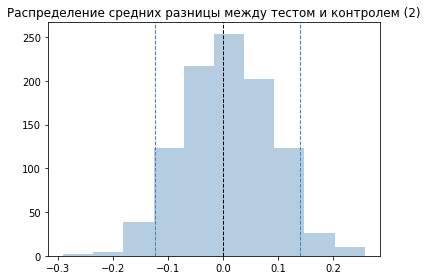

In [369]:
fig = plt.hist(sample_mean_2, bins=10, color='steelblue', edgecolor=None, alpha=0.4)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(np.quantile(sample_mean_2, 0.05), color='steelblue', linestyle='--', linewidth=1)
plt.axvline(np.quantile(sample_mean_2, 0.95), color='steelblue', linestyle='--', linewidth=1)
plt.title('Распределение средних разницы между тестом и контролем (2)')
plt.tight_layout()

### Будем применять изменения на всех пользователей?


## **Фича 3**

Команда перфоманса обновила предыдущую модель и увеличила точность предсказания

In [0]:
hyp_3 = pd.DataFrame({'user': users, 'test': test, 'control': control})

In [0]:
model_uplifts = value = np.random.poisson(1, len(hyp_3['test']))

In [0]:
hyp_3['test'] = hyp_2['test'] + model_uplifts

In [364]:
print('Среднее количество кликов в тестовой группе равно: ' + str(hyp_3['test'].mean()))

Среднее количество кликов в тестовой группе равно: 2.01036


In [365]:
print('Среднее количество кликов в контрольной группе равно: ' + str(hyp_3['control'].mean()))

Среднее количество кликов в контрольной группе равно: 0.99788


In [0]:
array_3 = hyp_3['test'] - hyp_3['control']

In [0]:
sample_mean_3 = bootstrap(permutations, array_3, sample_size)

In [368]:
print('Ожидаемая разница между тестом и контролем равна  ' + str(hyp_3['test'].mean()) \
      + ' с доверительным интервалом (' + str(round(np.quantile(sample_mean_3, 0.05), 2)) + ', ' \
      + str(round(np.quantile(sample_mean_3, 0.95), 2)) + ')')

Ожидаемая разница между тестом и контролем равна  2.01036 с доверительным интервалом (0.85, 1.18)


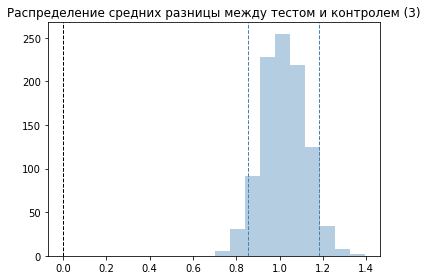

In [371]:
fig = plt.hist(sample_mean_3, bins=10, color='steelblue', edgecolor=None, alpha=0.4)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(np.quantile(sample_mean_3, 0.05), color='steelblue', linestyle='--', linewidth=1)
plt.axvline(np.quantile(sample_mean_3, 0.95), color='steelblue', linestyle='--', linewidth=1)
plt.title('Распределение средних разницы между тестом и контролем (3)')
plt.tight_layout()

### Будем применять изменения на всех пользователей?
